In [2]:
import numpy as np

In [4]:
divs = [i*2*np.pi/(25) for i in range(25)]

In [22]:
from collections import Counter
def mask(i):
    if (i)%2 ==1:
        return 1
    if (i)%8==0:
        return 5
    if (i)%4==2:
        return 3
    if (i)%16==4:
        return 10

    
 
    else:
        return 20

a = [mask(i) for i in range(25)]
c = Counter(a)

In [24]:
prize = {item:mask(i) for  (i, item) in enumerate(divs)}

In [52]:
def win(theta,bet):
    print(theta)
    bet_vals = np.asarray([1,3,5,10,20])
    for (i,div) in enumerate(divs):
    
        if theta<div:
            payout = prize[divs[i-1]]
          
            one_hot = np.where(bet_vals==payout,1,0)
            return (one_hot*(1+bet_vals)).dot(bet)
        elif i == 24:
            payout = prize[divs[i]]
            one_hot = np.where(bet_vals==payout,1,0)
            return (one_hot*(1+bet_vals)).dot(bet)
        
        
bet = np.asarray([1,1,0,0,0])
theta =.26
theta=(theta+10*(vel))%2*np.pi
win(theta,bet)

3.208420632171869


0

In [233]:
counter = {div:0 for div in divs}
theta = 0
old_div = divs[0]
res = []
num_itters = 100000
for i in range(num_itters):
    #make a random velocity and determite displacement by .5(omega_0 + omega)t 
    # t is assumed to be 10 omega_0 is 0 
    vel = np.random.uniform(7,10)
    #parameterizing the formula by which theta is changed could change the results
    theta=(theta+10*(vel))%2*np.pi
    for (i,div) in enumerate(divs):
         if theta<div:
                new_div  = divs[i-1]
                counter[divs[i-1]]+=1
                #We use two equiprobable regions because our interval is 0-2pi
                res.append((old_div,new_div>=np.pi))
                old_div=new_div
                break
         elif i == 24:
                new_div  = divs[-1]
                counter[divs[-1]]+=1
                res.append((old_div,new_div>=np.pi))
                old_div = new_div
                break

In [251]:
from scipy.stats import chisquare

$\chi^2$ goodness of fit test for the distribution of the actual observation if $p<alpha$ reject null hypothesis in this case null hypothesis is that the observations (each segement of the wheel) is equally likely

In [252]:

v1 = sum([(val-num_itters/25)**2/(num_itters/25) for val in counter.values()])
p = 1-chi2.cdf(v1,49)
p

0.9967612376088092

P is close to one so we cannot say that our observations are uniformly distrubted across the wheel



In [257]:
counter

{0.0: 3898,
 0.25132741228718347: 3914,
 0.5026548245743669: 3960,
 0.7539822368615503: 4025,
 1.0053096491487339: 4022,
 1.2566370614359172: 4056,
 1.5079644737231006: 3999,
 1.7592918860102842: 4093,
 2.0106192982974678: 3972,
 2.261946710584651: 4026,
 2.5132741228718345: 3949,
 2.764601535159018: 4065,
 3.015928947446201: 3922,
 3.267256359733385: 3862,
 3.5185837720205684: 4087,
 3.7699111843077513: 4096,
 4.0212385965949355: 4054,
 4.272566008882119: 4077,
 4.523893421169302: 4061,
 4.775220833456485: 3996,
 5.026548245743669: 3954,
 5.277875658030853: 3974,
 5.529203070318036: 4037,
 5.780530482605219: 3928,
 6.031857894892402: 3973}

In [235]:
counted = Counter(res)

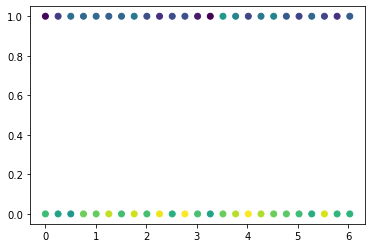

In [236]:
#scatter plot of result
np_res = np.asarray([key for key in counted.keys()])
plt.scatter(np_res[:,0],np_res[:,1],c=[val for val in counted.values()])

If we make the assumption that each tupple (i.e. we start at $\theta_n$ and go to either the top half of the wheel or the bottom half) is equally likely then we can use a $\chi^2$ goodness of fit test where we reject if the observed cdf has a p-value higher than $\alpha$ our desired confidence level

In [253]:
vals = sum([(val-num_itters/50)**2/(num_itters/50) for val in counted.values()])

In [254]:
p = 1-chi2.cdf(vals,49)
p

0.0

Since p approaches 0 we reject

In [255]:
vals

187.58900000000003

In [245]:
counted

Counter({(0.0, True): 1847,
         (3.5185837720205684, True): 2008,
         (4.272566008882119, True): 1964,
         (5.780530482605219, False): 2042,
         (3.7699111843077513, True): 1980,
         (4.775220833456485, False): 2070,
         (1.0053096491487339, False): 2075,
         (3.015928947446201, True): 1864,
         (3.7699111843077513, False): 2116,
         (3.267256359733385, False): 2020,
         (2.5132741228718345, True): 1913,
         (5.026548245743669, False): 2052,
         (0.0, False): 2052,
         (2.5132741228718345, False): 2036,
         (2.261946710584651, True): 1885,
         (3.5185837720205684, False): 2079,
         (0.25132741228718347, False): 2020,
         (2.261946710584651, False): 2141,
         (1.7592918860102842, True): 1966,
         (5.277875658030853, False): 2032,
         (4.523893421169302, False): 2079,
         (6.031857894892402, True): 1933,
         (5.529203070318036, False): 2131,
         (0.5026548245743669, True): 1